In [ ]:
!git clone https://github.com/misbah4064/face_recognition.git
%cd face_recognition

Cloning into 'face_recognition'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 5), reused 23 (delta 3), pack-reused 0
Unpacking objects: 100% (26/26), 3.03 MiB | 9.92 MiB/s, done.
/content/face_recognition/face_recognition


In [ ]:
pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Load libraries
!pip install -q face_recognition
!pip install -q fer
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import face_recognition
import numpy as np
from PIL import ImageDraw
import PIL.Image
from io import BytesIO
import cv2
import operator
import time
from google.colab import files
from google.colab.patches import cv2_imshow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.7 MB/s eta 0:00:00


In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

face_1 = face_recognition.load_image_file("khilti.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("samira.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("param.jpg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

face_4 = face_recognition.load_image_file("krishani.jpg")
face_4_encoding = face_recognition.face_encodings(face_4)[0]

face_5 = face_recognition.load_image_file("zeel.jpg")
face_5_encoding = face_recognition.face_encodings(face_5)[0]

face_6 = face_recognition.load_image_file("naman.jpg")
face_6_encoding = face_recognition.face_encodings(face_6)[0]

face_7 = face_recognition.load_image_file("nishika.jpg")
face_7_encoding = face_recognition.face_encodings(face_7)[0]

face_8 = face_recognition.load_image_file("pradnya.png")
face_8_encoding = face_recognition.face_encodings(face_8)[0]

face_9 = face_recognition.load_image_file("kenil.png")
face_9_encoding = face_recognition.face_encodings(face_9)[0]

face_10 = face_recognition.load_image_file("pratik.jpg")
face_10_encoding = face_recognition.face_encodings(face_10)[0]

face_11 = face_recognition.load_image_file("owaiz.jpg")
face_11_encoding = face_recognition.face_encodings(face_11)[0]

face_12 = face_recognition.load_image_file("kashyap.jpg")
face_12_encoding = face_recognition.face_encodings(face_12)[0]


known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_3_encoding,
    face_4_encoding,
    face_5_encoding,
    face_6_encoding,
    face_7_encoding,
    face_8_encoding,
    face_9_encoding,
    face_10_encoding,
    face_11_encoding,
    face_12_encoding

]

known_face_names = [
    "Khilti",
    "Samira",
    "Param",
    "Krishani",
    "Zeel",
    "Naman",
    "Nishika",
    "Pradnya",
    "Kenil",
    "Pratik",
    "Owaiz",
    "Kashyap"
]
print("Done learning and creating profiles")

KeyboardInterrupt: ignored

In [ ]:
#@title Upload image with faces
uploaded = files.upload() #https://unsplash.com/photos/1qfy-jDc_jo

Saving group2.jpg to group2 (1).jpg


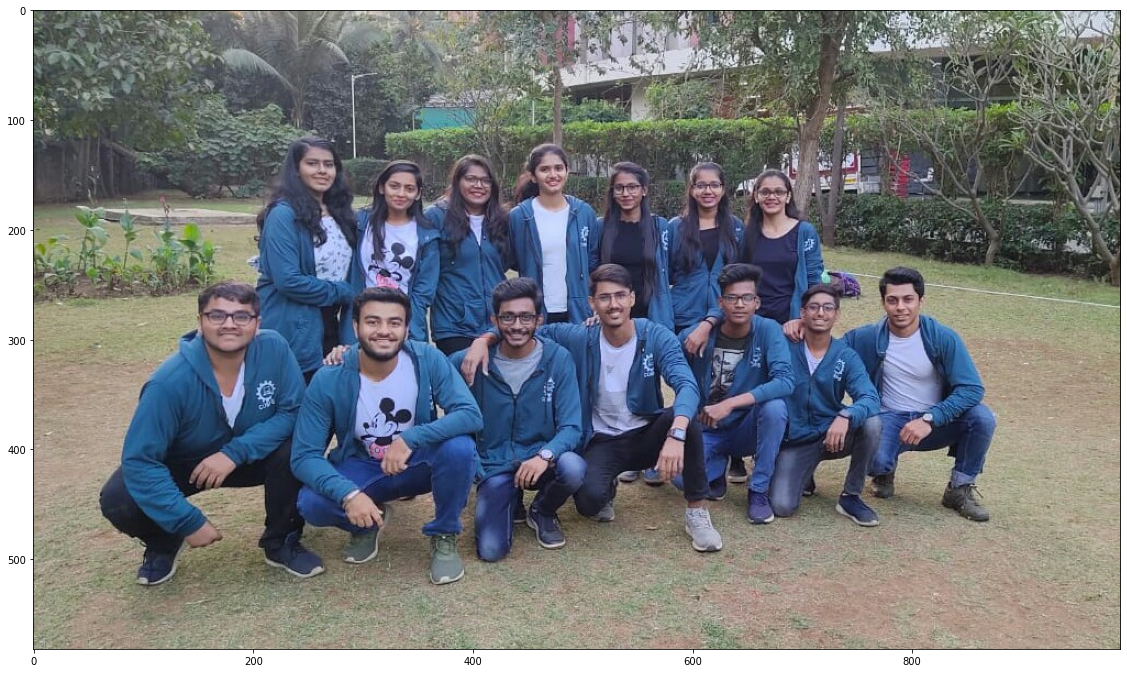

In [ ]:
#@title Display image
image = face_recognition.load_image_file(list(uploaded.keys())[0])
boundary = 24
im = PIL.Image.open(list(uploaded.keys())[0])
height = (im.size[1] / im.size[0]) * 20
fig=plt.subplots(figsize=(20,height))
imshow(im)

Number of faces: 14
Time taken: 0.48  seconds


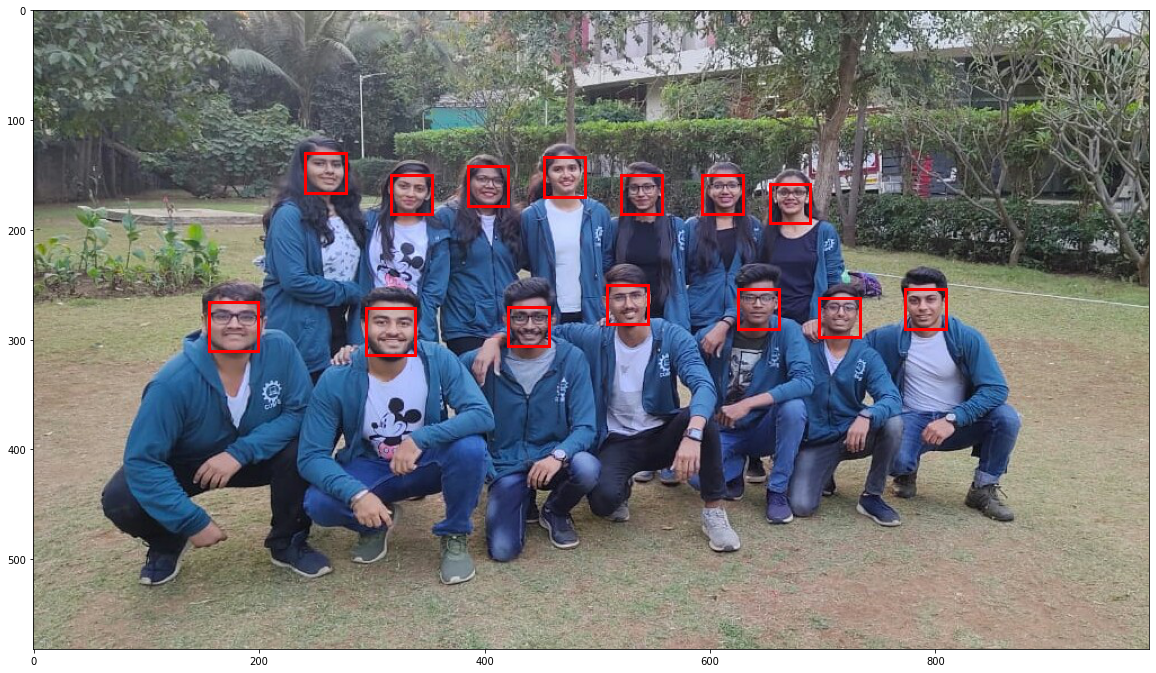

In [ ]:
#@title Use 'Face Recognition' library and draw a red box around the faces
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(20,height))
for face_location in face_locations:
    top, right, bottom, left = face_location
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",round(end-start,2)," seconds")

Khilti
Kashyap
Naman
Pratik
Owaiz
Unknown
Zeel
Kenil
Pradnya
Param
Unknown
Nishika
Samira
Krishani


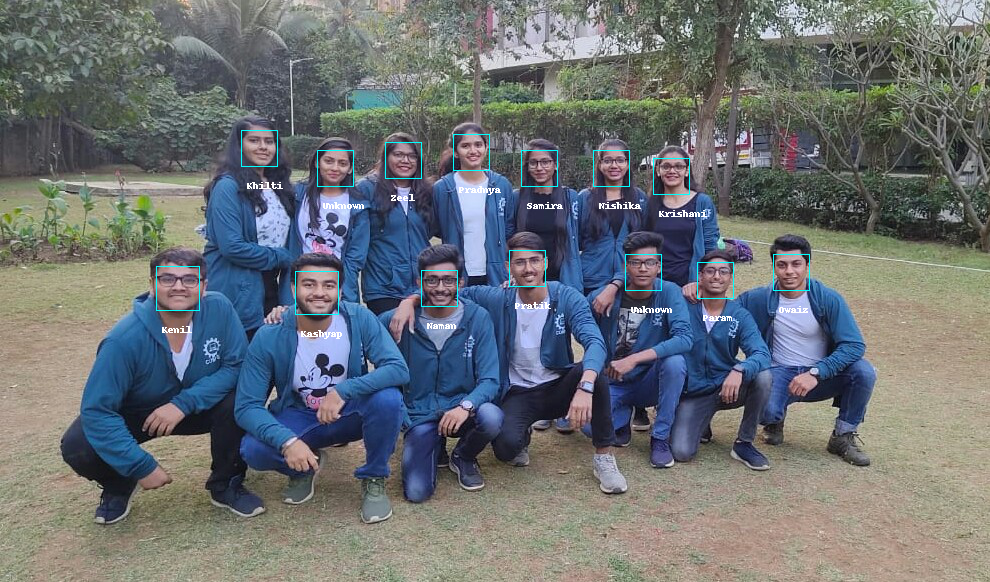

In [ ]:
image = face_recognition.load_image_file(list(uploaded.keys())[0])

face_locations = face_recognition.face_locations(image)
face_encodings = face_recognition.face_encodings(image, face_locations)

pil_image = Image.fromarray(image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    print(name)

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    # draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height + 25), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

In [ ]:
import csv

header = ['name']

with open('attendance.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write the data
    writer.writerow(known_face_names)